# Bachelor Project: Code

### Theory:

Zernike polynomials:

$
\begin{equation}
    Z_n^m (\rho, \theta)= N^m_n
\begin{cases}
    R_n^{|m|} (\rho)cos(m\theta)   & \text{if } m\geq 0\\
    R_n^{|m|} (\rho)sin(|m|\theta) & \text{if } m < 0\\
\end{cases}
\end{equation}
$


where:

$
\begin{equation}
    R_n^{m}(\rho) = \sum^{\frac{n - |m|}{2}}_{k = 0} \frac{(-1)^k(n-k)!}{k! (\frac{n+m}{2} - k)!(\frac{n-m}{2} - k)!} \rho^{n - 2k}
\end{equation}
$

and

$
\begin{equation}
    N_n^m = \sqrt{\frac{2n + 2}{1 + \delta_{m0}}} \ \ \ \text{(Normalization coefficient)}
\end{equation}
$

WFE:

$WFE = Z \cdot C$

$Z^{-1} \cdot WFE = C$

SVD:

### Import Libraries and conditions:

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
import numpy as np
import pandas as pd
import csv

#Define number of pixels for setup:
npix = 188

### Define R:

In [2]:
#Define odd/even function:
def _is_odd(integer):
    return integer & 1

#Define function R, dependent on m, n, rho:
def R(n, m, rho):
    m = int(np.abs(m))
    n = int(np.abs(n))
    
    #Define an array by shape rho:
    output = np.zeros(rho.shape)
    
    #Define R, see Theory above:
    if _is_odd(n - m):
        return 0
    else:
        for k in range(int((n - m) / 2) + 1):
            coef = ((-1) ** k * factorial(n - k) /
                    (factorial(k) * factorial((n + m) / 2. - k) * factorial((n - m) / 2. - k)))
            output += coef * rho ** (n - 2 * k)
        return output

### Define Z:

In [3]:
# Define Zernike Polynomial:
def Zernike(n, m, npix, rho = None, theta = None, outside = np.nan):
    
    # To define a zernike polynomial, choose your n & m value. Example: Zernike(1, -1) returns zernike polynomial m = 1, n = -1.
    
    # Set x, y grid of size npix
    # Normalized: [-1, 1]:
    x = (np.arange(npix, dtype=np.float64) - (npix) / 2) / ((npix) / 2)
    y = x
    xx, yy = np.meshgrid(x, y)
    
    # Define rho, theta:
    rho = np.sqrt(xx ** 2 + yy ** 2)
    theta = np.arctan2(yy, xx)

    # Define aperture:
    aperture = (rho <= 1)

    # Define Z = N*R*cos/sin(rho), see Theory above:
    if m == 0:
        if n == 0:
            zernike_result = aperture
        else:
            norm_coeff = 1            #Normalization coefficient
            zernike_result = norm_coeff * R(n, m, rho) * aperture
    elif m > 0:
        norm_coeff = np.sqrt(2) * np.sqrt(n + 1)
        zernike_result = norm_coeff * R(n, m, rho) * np.cos(np.abs(m) * theta) * aperture
    else:
        norm_coeff = np.sqrt(2) * np.sqrt(n + 1)
        zernike_result = norm_coeff * R(n, m, rho) * np.sin(np.abs(m) * theta) * aperture

    zernike_result[(rho > 1)] = outside
    return zernike_result

### Define Zernike Polynomial List

In [4]:
#Produce list of zernikes from n = [0, N]:
def Zlist(N, npix):
    Z = []
    for n in range (N):
        for m in range(-n, n + 1):
            if _is_odd(n - m + 1):
                Z.append(Zernike(n, m, npix))
    return Z



#Produce all zernike polynomials up to n modes:
Y = Zlist(5, npix)

#All zernike polynomials up to n, minus the piston:
Z = []
for i in range(1, len(Y)):
    Z.append(Y[i])

print("Length with piston: (n = m = 0)", len(Y))
print("Length without piston: (n = m = 0)", len(Z))

Length with piston: (n = m = 0) 15
Length without piston: (n = m = 0) 14


C:\Users\Ruurd\AppData\Local\Temp\ipykernel_3356\1676499008.py:19: DeprecationWarning: Using factorial() with floats is deprecated
  (factorial(k) * factorial((n + m) / 2. - k) * factorial((n - m) / 2. - k)))


### Run first 9 polynomials:

Running first 9 zernike polynomials (excluding piston; n = m = 0)


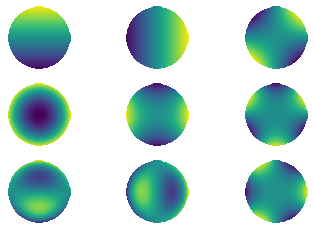

In [5]:
#Run first 9 zernike polynomials (excluding n = m = 0):
print("Running first 9 zernike polynomials (excluding piston; n = m = 0)")
plt.figure(1)
plt.title("Test")
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(Z[i-1], origin='lower', extent=(-1, 1, -1, 1))
    plt.axis('off')
plt.show()

### Create WFE from random set of coefficients:

Shape of C: (14,)
Shape of Z: (14, 188, 188)
Shape of WFE: (188, 188)


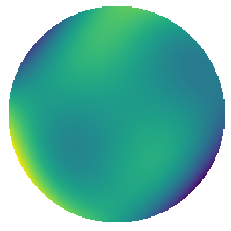

In [6]:
#Define a random set of coefficients:
def RandomC(length):
    # length must be written as "len(Zlist(N))""
    C = np.random.normal(size=length)
    return C

#Produce a list of random coefficients; a matrix C:
C = RandomC(len(Z))

#Define function WFE = C * Z
def createWFE(C, Z):
    Phi = np.zeros(np.shape(Z))
    Test = np.zeros((npix, npix))
    for i in range(npix):
        for j in range(npix):
            for k in range(len(C)):
                Phi[k][j][i] = Z[k][j][i]*C[k]

    for i in range(len(C)):
        Test += Phi[i]
    return Test

#Produce testset of WFE from C*Z:
TestWFE = createWFE(C, Z)

#Print shapes:
print("Shape of C:", np.shape(C))
print("Shape of Z:", np.shape(Z))
print("Shape of WFE:", np.shape(TestWFE))

#PLOT
plt.figure(1)
plt.subplot(1, 1, 1)
plt.imshow(TestWFE, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

### Create coloumn vector of Z:

Shape coloumn vector Z: (35344, 14)
Shape coloumn vector WFE: (35344, 1)
Shape reconstructed WFE: (188, 188)


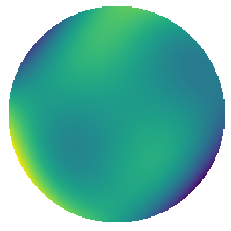

In [8]:
#Define coloumn vector of Z, replace NaN values with 0
T = np.nan_to_num(Z, np.nan == 0)
ZC = np.zeros([npix**2, len(Z)])

#Create coloumn vector for every zernike polynomial:
for i in range(0, len(Z)):
    ZC[:,i] = T[:][:][i].reshape([npix**2,])

#Create a coloumn WFE
ZxC = np.multiply(ZC, C)

#Define coloumn vector of WFE:
CWFE = np.reshape(TestWFE, [npix**2, 1])

#Reconsruct WFE:
RWFE = np.reshape(CWFE, (npix, npix))

#Print shapes:
print("Shape coloumn vector Z:", np.shape(ZC))
print("Shape coloumn vector WFE:", np.shape(CWFE))
print("Shape reconstructed WFE:", np.shape(RWFE))



#PLOT:
plt.figure(1)
plt.subplot(1, 1, 1)
plt.imshow(RWFE, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

### Define pseudoinverse using SVD:

In [9]:
#Define pseudinverse of matrix Z, with size (npix, npix):
def pinv(G, npix):
    
    #Produce u, s, vh from SVD:
    u, s, vh = np.linalg.svd(G, full_matrices=True)
    
    #Define inverse diagional matrix s^[-1]:
    smat = np.zeros((len(Z), npix**2))
    smat[:len(Z), :len(Z)] = np.diag(1/s)

    #Find conjugates of u and vh
    ucon = u.conj().T
    vcon = vh.conj().T

    #Define inverse:
    inv = np.dot(vcon, np.dot(smat, ucon))
    return inv, s

### Find coefficients from random WFE:

Shape found inverse Z: (14, 1)
Shape coloumn WFE: (35344, 1)
Shape reconstructed WFE: (188, 188)


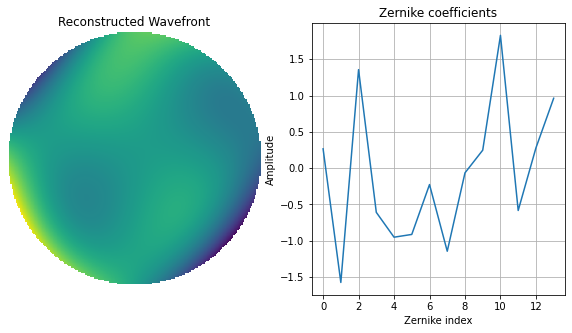

Comparison defined/found zernike coefficients: 
 
 [array([-7.71605002e-15]), array([-1.33226763e-15]), array([1.33226763e-15]), array([5.55111512e-16]), array([-4.77395901e-15]), array([1.11022302e-15]), array([-5.99520433e-15]), array([-4.4408921e-15]), array([1.66533454e-16]), array([-3.21964677e-15]), array([-3.99680289e-15]), array([2.22044605e-16]), array([2.49800181e-15]), array([-8.8817842e-16])]


In [10]:
#Find inverse of coloumn vector Z:
inv = pinv(ZC, npix)

#Reshape TestWFE into coloumn vector, replace NaN values with 0:
CWFE = np.reshape(TestWFE, [npix**2, 1])
T1 = np.nan_to_num(TestWFE, np.nan == 0)

#Find set of Random Coefficients
RC = np.dot(inv[0], CWFE)

#Create WFE from newfound coefficients:
WFE1 = createWFE(RC, Z)

#Comparison between defined and recovered coefficients:
Comp = []
for i in range(len(C)):
    Comp.append(RC[i]-C[i])



#Print values for error handling:
print("Shape found inverse Z:", np.shape(RC))
print("Shape coloumn WFE:", np.shape(CWFE))
print("Shape reconstructed WFE:", np.shape(WFE1))



### PLOT ###

#Show WFE from random set of coefficients:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Reconstructed Wavefront")
plt.imshow(WFE1, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Zernike coefficients")
plt.plot(RC)
plt.ylabel("Amplitude")
plt.xlabel("Zernike index")
plt.grid()
plt.show()

print("Comparison defined/found zernike coefficients: \n \n", Comp)

### Read Interferometer file

C:\Users\Ruurd\AppData\Local\Temp\ipykernel_3356\3700210990.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1 = data1.astype(np.float)


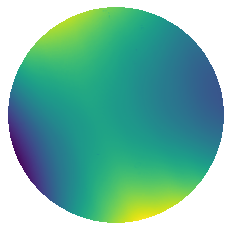

In [11]:
#Import data from file:
with open('badfoldmirror.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

#Delete last data point, define array, in floats, NaNs removed:
for i in range(len(data)):
    del data[i][1024]
data1 = np.array(data)
data1 = data1.astype(np.float)
data1[data1 > 255] = np.NaN


#Produce testset of WFE from C*Z:
plt.figure(1)
plt.subplot(1, 1, 1)
plt.imshow(data1, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

### Read masked Interferometer file:

C:\Users\Ruurd\AppData\Local\Temp\ipykernel_3356\3021964354.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  datamask = datamask.astype(np.float)


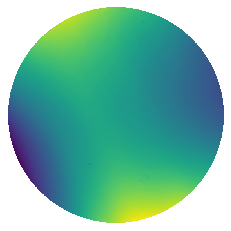

In [12]:
#Import data from file:
with open('badfoldmirror_mask.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

#Delete last data point, define array, in floats, NaNs removed:
for i in range(len(data)):
    del data[i][-1]
datamask = np.array(data)
datamask = datamask.astype(np.float)
datamask[datamask > 255] = np.NaN


#Produce testset of WFE from C*Z:
plt.figure(1)
plt.subplot(1, 1, 1)
plt.imshow(datamask, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

print()

### Reduce image size

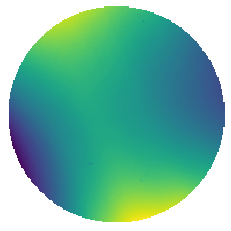

In [13]:
#Slice 752 pixel image to 128 pixels:

#Slice:
sliced = 4
npix1 = int(len(datamask)/sliced)
data2 = np.zeros([npix1, npix1])

for i in range(len(datamask)):
    if i % sliced == 0:
        k = int(i/sliced)
        for j in range(len(datamask)):
            if j % sliced == 0:
                n = int(j/sliced)
                data2[k][n] = (datamask[i][j])

                
# Plot 128x128 pixel image:
plt.figure(1)
plt.subplot(1, 1, 1)
plt.imshow(data2, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

### Interferometer coefficients using SVD

Showing WFE from random set of coefficients


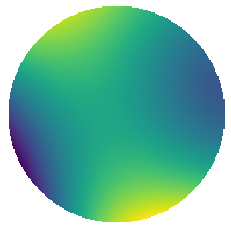

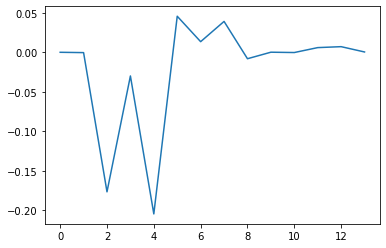

[[ 6.48466016e-05]
 [-3.55692453e-04]
 [-1.76536870e-01]
 [-2.98838753e-02]
 [-2.04478800e-01]
 [ 4.56771859e-02]
 [ 1.34989481e-02]
 [ 3.91273868e-02]
 [-8.08384254e-03]
 [ 1.69139703e-04]
 [-2.52388670e-04]
 [ 5.98059433e-03]
 [ 7.18267475e-03]
 [ 4.59991680e-04]]


In [14]:
#Reshape TestWFE into coloumn vector, replace NaN values with 0:
CWFE1 = np.reshape(data2, [npix**2, 1])
T1 = np.nan_to_num(data2, np.nan == 0)

#Find set of Random Coefficients
RC1 = np.dot(inv[0], CWFE1)

#Create WFE from newfound coefficients:
WFE1 = createWFE(RC1, Z)


#Show WFE from random set of coefficients:
print("Showing WFE from random set of coefficients")
plt.figure(1)
plt.subplot(1, 1, 1)
plt.imshow(WFE1, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

plt.figure(1)
plt.subplot(1,1,1)
plt.plot(RC1)
plt.show()

print(RC1)

### Read SH Data sets

['     2.700', '       NaN', '   -35.531', '   -32.091', '   -28.771', '   -25.614', '   -22.572', '   -19.669', '   -16.914', '   -14.349', '   -11.924', '    -9.703', '    -7.587', '    -5.757', '    -3.996', '    -2.341', '    -0.739', '     0.711', '     2.075', '     4.683', '']


C:\Users\Ruurd\AppData\Local\Temp\ipykernel_3356\2362621163.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data4 = data4.astype(np.float)
C:\Users\Ruurd\AppData\Local\Temp\ipykernel_3356\2362621163.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data6 = data6.astype(np.float)


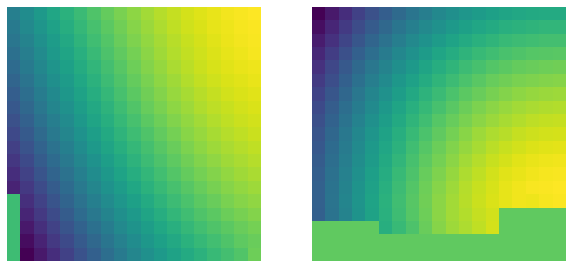

In [15]:
with open('Testdata3 with bad mirror.csv', newline='') as f:
    reader = csv.reader(f)
    data3 = list(reader)
    
with open('Testdata4 without mirror.csv', newline='') as f:
    reader = csv.reader(f)
    data5 = list(reader)

data4 = []
data6 = []
for i in range(101,120):
    data4.append(data3[i])
    data6.append(data5[i])
    
print(data4[0])

for i in range(len(data4)):
    del data4[i][20]
    del data4[i][0]
    del data6[i][20]
    del data6[i][0]
    
data4 = np.array(data4)
data4[0][0] = 0
data4 = data4.astype(np.float)
data4 = np.nan_to_num(data4, np.nan == 0)
    
data6 = np.array(data6)
data6[0][0] = 0
data6 = data6.astype(np.float)
data6 = np.nan_to_num(data6, np.nan == 0)

dat = data4-data6

#Produce testset of WFE from C*Z:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(data4, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(data6, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

C:\Users\Ruurd\AppData\Local\Temp\ipykernel_3356\1676499008.py:19: DeprecationWarning: Using factorial() with floats is deprecated
  (factorial(k) * factorial((n + m) / 2. - k) * factorial((n - m) / 2. - k)))


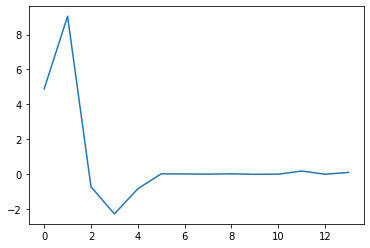

In [16]:
npix2 = 19

Y = Zlist(5, npix2)

#All zernike polynomials up to n, minus the piston:
Z = []
for i in range(1, len(Y)):
    Z.append(Y[i])

#Define coloumn vector, replace NaN values with 0
T = np.nan_to_num(Z, np.nan == 0)
ZC = np.zeros([npix2**2, len(Z)])

#Create coloumn vector for every zernike polynomial:
for i in range(0, len(Z)):
    ZC[:,i] = T[:][:][i].reshape([npix2**2,])

#Find inverse of coloumn vector Z:
inv = pinv(ZC, npix2)

CWFE2 = np.reshape(data4, [npix2**2, 1])
T2 = np.nan_to_num(data4, np.nan == 0)

#Find set of Random Coefficients:
RC2 = np.dot(inv[0], CWFE2)

CWFE3 = np.reshape(data6, [npix2**2, 1])
T3 = np.nan_to_num(data6, np.nan == 0)

#Find set of Random Coefficients:
RC3 = np.dot(inv[0], CWFE3)

plt.figure(1)
plt.subplot(1,1,1)
plt.plot(RC2)
plt.show()

C:\Users\Ruurd\AppData\Local\Temp\ipykernel_3356\1019621657.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coeff = coeff.astype(np.float)
C:\Users\Ruurd\AppData\Local\Temp\ipykernel_3356\1676499008.py:19: DeprecationWarning: Using factorial() with floats is deprecated
  (factorial(k) * factorial((n + m) / 2. - k) * factorial((n - m) / 2. - k)))


[ 5.552e+00  1.487e+00 -1.370e-01  5.900e-02 -1.110e-01  2.700e-02
 -4.000e-03  3.000e-03 -1.000e-03 -2.000e-03 -1.000e-03 -3.000e-03
  2.000e-03 -2.000e-03]


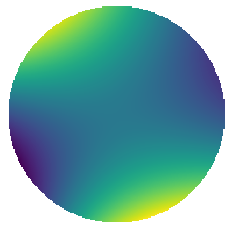

In [18]:
def SHcoeff(data):
    coeff = []
    for i in range(44,59):
        coeff.append(data[i][3])
    del coeff[0]
    coeff = np.array(coeff)
    coeff = coeff.astype(np.float)
    return coeff

coeff1 = SHcoeff(data3)
coeff2 = SHcoeff(data5)

coeffSH = np.zeros(len(coeff1))
for i in range(len(coeff1)):
    coeffSH[i] = (coeff1[i] - coeff2[i])

    
npix2 = 188

Y = Zlist(5, npix2)

#All zernike polynomials up to n, minus the piston:
Z = []
for i in range(1, len(Y)):
    Z.append(Y[i])
print(coeffSH)

coeffSH[0] = coeffSH[1] = 0

#Produce testset of WFE from C*Z:
TestWFE = createWFE(coeffSH, Z)

#PLOT
plt.figure(1)
plt.subplot(1, 1, 1)
plt.imshow(TestWFE, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

In [20]:
print("Coeff difference:", coeffSH[2:])

Coeff difference: [-0.137  0.059 -0.111  0.027 -0.004  0.003 -0.001 -0.002 -0.001 -0.003
  0.002 -0.002]


0.0042
14


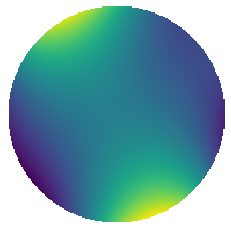

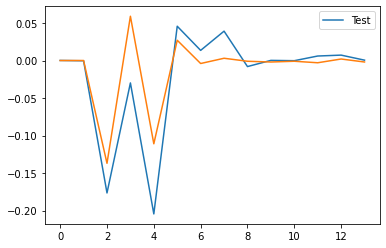

In [58]:
with open('Book1.csv', newline='') as f:
    reader = csv.reader(f)
    data7 = list(reader)
    
RC2 = np.zeros(len(range(2, 17)))
for i in range(0, 15):
    RC2[i] = data7[i+2][10]

rms = np.zeros(len(range(2, 17)))
rms[0] = data7[3][15]
for i in range(0, 15):
    if data7[i+2][15] == '':
        rms[i] = rms[i-1]
    else:
        rms[i] = data7[i+2][15]
        
print(RC2[0])


rms3 = np.zeros(len(range(0, 15)))
N = np.zeros(len(range(0, 15)))
N[0] = 0
N[1] = N[2] = 1
for i in range(0, 15):
    if i < 1:
        N[i] = 0
    else:
        if i < 3:
            rms3[i] = 0.176
            N[i] = 1
        else:
            if i < 6:
                rms3[i] = 0.0257
                N[i] = 2
            else:
                if i < 10:
                    rms3[i] = 0.0257
                    N[i] = 3
                else:
                    rms3[i] = 0.009
                    N[i] = 4

RC3 = RC2*0.001*np.sqrt(2*N+2)

print(len(RC3[1:]))
RC3[3], RC3[4] = RC3[4], RC3[3]
TestWFE = createWFE(RC3[1:], Z)

#PLOT
plt.figure(1)
plt.subplot(1, 1, 1)
plt.imshow(TestWFE, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

plt.figure(1)
plt.subplot(1,1,1)
plt.plot(RC1, label="Test")
plt.plot(coeffSH)
#plt.plot(RC1)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.title("Comparison of coefficients (with rms)")
plt.ylim([-0.2, 0.2])
plt.xlim([1.95, 12])
plt.xlabel("Zernike polynomials, n = [2, 4]")
plt.ylabel("Zernike coefficients")
plt.errorbar(x, RC4, yerr = rms2, fmt=':', capsize=3, capthick=1)
plt.errorbar(x, coeffSH, yerr = rms3, fmt=':', capsize=3, capthick=1)
plt.legend(('Interferometer', 'Shack-Hartmann'), loc='upper right')
plt.grid()
plt.fill_between(x, RC4+rms2, RC4-rms2, alpha=.25)
plt.fill_between(x, coeffSH+rms3, coeffSH-rms3, alpha=.25)
plt.show()

## 2nd Data analysis

### Read SH:

In [ ]:
with open('23_06_SH_mir1_2.csv', newline='') as f:
    reader = csv.reader(f)
    data3 = list(reader)
    
with open('23_06_SH_ref_4_after.csv', newline='') as f:
    reader = csv.reader(f)
    data5 = list(reader)

data4 = []
data6 = []
for i in range(101,120):
    data4.append(data3[i])
    data6.append(data5[i])


for i in range(len(data4)):
    del data4[i][36]
    del data4[i][35]
    del data4[i][0]
    del data6[i][36]
    del data6[i][35]
    del data6[i][0]
    
    
data4 = np.array(data4)
data4 = data4.astype(np.float)
data4 = np.nan_to_num(data4, np.nan == 0)
    
data6 = np.array(data6)
data6 = data6.astype(np.float)
data6 = np.nan_to_num(data6, np.nan == 0)

#Produce testset of WFE from C*Z:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(data4, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(data6, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.show()

In [ ]:
npix2 = 19

Y = Zlist(10, npix2)

#Define pseudinverse of matrix Z, with size (npix, mpix):
def pinv(G, npix, mpix):
    
    #Produce u, s, vh from SVD:
    u, s, vh = np.linalg.svd(G, full_matrices=True)
    
    #Define inverse diagional matrix s^[-1]:
    smat = np.zeros((len(Z), npix*mpix))
    smat[:len(Z), :len(Z)] = np.diag(1/s)

    #Find conjugates of u and vh
    ucon = u.conj().T
    vcon = vh.conj().T

    #Define inverse:
    inv = np.dot(vcon, np.dot(smat, ucon))
    return inv, s

npix2 = 19
mpix2 = 34

nmpix = 19*34


#All zernike polynomials up to n, minus the piston:
Z = []
for i in range(1, len(Y)):
    Z.append(Y[i])

#Define coloumn vector, replace NaN values with 0
T = np.nan_to_num(Z, np.nan == 0)
ZC = np.zeros([nmpix, len(Z)])
print(np.shape(T))


#Create coloumn vector for every zernike polynomial:
for i in range(0, len(Z)):
    ZC[:,i] = T[:][:][i].reshape([nmpix,])

#Find inverse of coloumn vector Z:
inv = pinv(ZC, npix2, mpix2)

CWFE2 = np.reshape(data4, [nmpix, 1])
T2 = np.nan_to_num(data4, np.nan == 0)

#Find set of Random Coefficients:
RC2 = np.dot(inv[0], CWFE2)

CWFE3 = np.reshape(data6, [nmpix, 1])
T3 = np.nan_to_num(data6, np.nan == 0)

#Find set of Random Coefficients:
RC3 = np.dot(inv[0], CWFE3)

plt.figure(1)
plt.subplot(1,1,1)
plt.plot(RC2)
plt.show()

In [ ]:
with open('23_06_SH_mir1_2.csv', newline='') as f:
    reader = csv.reader(f)
    data3 = list(reader)
    
with open('23_06_SH_ref_4_after.csv', newline='') as f:
    reader = csv.reader(f)
    data5 = list(reader)

def SHcoeff(data):
    coeff = []
    for i in range(44,59):
        coeff.append(data[i][3])
#    del coeff[0]
    coeff = np.array(coeff)
    coeff = coeff.astype(np.float)
    return coeff

coeff1 = SHcoeff(data3)
coeff2 = SHcoeff(data5)

coeffSH = np.zeros(len(coeff1))
for i in range(len(coeff1)):
    coeffSH[i] = (coeff1[i] - coeff2[i])

plt.figure(1)
plt.subplot(1,1,1)
plt.plot(coeffSH)
plt.xlabel("Zernike polynomials, n = [2, 4]")
plt.ylabel("Zernike coefficients")
plt.ylim([0.6, -0.6])
plt.xlim([2.95, 12])
plt.show()

### Interferometer data:

In [ ]:
with open('Book2.csv', newline='') as f:
    reader = csv.reader(f)
    data7 = list(reader)
    
print(data7[1][2])
    
RC2 = np.zeros(len(range(0, 15)))
for i in range(0, 15):
    RC2[i] = data7[i+1][2]



rms = np.zeros(len(range(0, 15)))
rms[0] = data7[2][6]
print(rms[0])
for i in range(0, 15):
    if data7[i+1][6] == '':
        rms[i] = rms[i-1]
    else:
        rms[i] = data7[i+1][6]

rms3 = np.zeros(len(range(0, 15)))
N = np.zeros(len(range(0, 15)))
for i in range(0, 15):
    if i < 3:
        rms3[i] = 0.599
        N[i] = 2
    else:
        if i < 10:
            rms3[i] = 0.016
            N[i] = 3
        else:
            rms3[i] = 0.014
            N[i] = 4


RC3 = RC2*0.001/np.sqrt(2*N+2)
RC4 = RC3[3:]
rms = rms*0.001#/np.sqrt(2*N+2)
rms2 = rms[3:]

RC3[3], RC3[4] = RC3[4], RC3[3]
rms[3], rms[4] = rms[4], rms[3]
print(RC3)

plt.figure(figsize=(20, 20))
x = np.arange(len(RC3))
print(len(RC3))

plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.title("Wafer: Comparison of coefficients (with rms)")
plt.ylim([1, -1])
plt.xlim([2.95, 12])
plt.xlabel("Zernike polynomials, n = [2, 4]")
plt.ylabel("Zernike coefficients")
plt.errorbar(x, RC3, yerr = rms, fmt=':', capsize=3, capthick=1)
plt.errorbar(x, coeffSH, yerr = rms3, fmt=':', capsize=3, capthick=1)
plt.legend(('Interferometer', 'Shack-Hartmann'), loc='upper right')
plt.grid()
plt.fill_between(x, RC3+rms, RC3-rms, alpha=.25)
plt.fill_between(x, coeffSH+rms3, coeffSH-rms3, alpha=.25)
plt.show()

In [ ]:
#Produce all zernike polynomials up to n modes:
Y = Zlist(5, npix)

#All zernike polynomials up to n, minus the piston:
Z = []
for i in range(1, len(Y)):
    Z.append(Y[i])
    
coeffSH[0] = coeffSH[1] = coeffSH[2] = 0
print(coeffSH)
    
WFE = createWFE(coeffSH[:-1], Z)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(WFE, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')

coeffSH[0] = coeffSH[1] = coeffSH[2] = 0
RC3[0] = RC3[1] = RC3[2] = 0

print(RC3)
    
WFE2 = createWFE(RC3[:-1], Z)

plt.subplot(1, 2, 2)
plt.imshow(WFE2, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')